In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [77]:
print(os.listdir('C:\\Users\\This PC\\Downloads\\Intrusion Detection System'))

['.ipynb_checkpoints', 'dataset', 'MODELS.ipynb', 'README.md']


In [78]:
with open("C:\\Users\\This PC\\Downloads\\Intrusion Detection System\\dataset\\kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [79]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [80]:
with open("C:\\Users\\This PC\\Downloads\\Intrusion Detection System\\dataset\\training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [81]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [82]:
path = "C:\\Users\\This PC\\Downloads\\Intrusion Detection System\\dataset\\kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

In [83]:
df.shape

(494021, 43)

In [84]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [85]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

DATA PREPROCESSING

In [86]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

CATEGORICAL FEATURES DISTRIBUTION

In [87]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar",color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

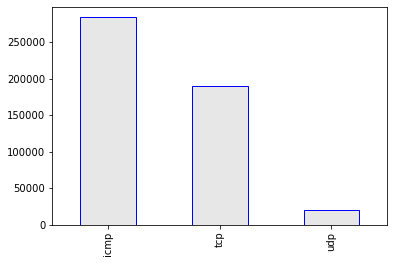

In [88]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

Attack Type(The attack types grouped by attack, it's what we will predict)

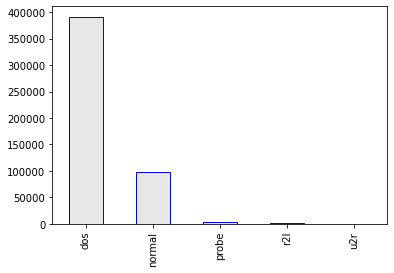

In [89]:
bar_graph('Attack Type')

In [90]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [91]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [92]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [93]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [94]:
df.drop('service',axis = 1,inplace= True)

In [95]:
df.shape

(494021, 42)

MODELLING

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [97]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 41)
(330994, 40) (163027, 40)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [98]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [99]:
model1 = GaussianNB()

In [100]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [101]:
print("Training time: ",end_time-start_time)

Training time:  1.1386780738830566


In [102]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [103]:
print("Testing time: ",end_time-start_time)

Testing time:  0.6692402362823486


In [104]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8793573297401162
Test score is: 0.8791672545038552


DECISION TREE

In [105]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [106]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [107]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [108]:
print("Training time: ",end_time-start_time)

Training time:  2.438572883605957


In [109]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [110]:
print("Testing time: ",end_time-start_time)

Testing time:  0.07717037200927734


In [111]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905255080152511
Test score is: 0.990437166849663


RANDOM FOREST

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model3 = RandomForestClassifier(n_estimators=30)

In [114]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [115]:
print("Training time: ",end_time-start_time)

Training time:  18.136284589767456


In [116]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [117]:
print("Testing time: ",end_time-start_time)

Testing time:  0.920987606048584


In [61]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999728091747887
Test score is: 0.9996687665233366


SUPPORT VECTOR MACHINE

In [46]:
from sklearn.svm import SVC

In [47]:
model4 = SVC(gamma = 'scale')

In [50]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [51]:
print("Training time: ",end_time-start_time)

Training time:  170.2682135105133


In [52]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [53]:
print("Testing time: ",end_time-start_time)

Testing time:  134.02384185791016


In [54]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.998939557816758
Test score is: 0.9988958884111221


LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model5 = LogisticRegression(max_iter=1200000)

In [57]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [62]:
print("Training time: ",end_time-start_time)

Training time:  0.5695676803588867


In [63]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [64]:
print("Testing time: ",end_time-start_time)

Testing time:  0.027998924255371094


In [65]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9948307220070455
Test score is: 0.9949517564575193


GRADIENT BOOSTING CLASSIFIER

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
model6 = GradientBoostingClassifier(random_state=0)

In [68]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [69]:
print("Training time: ",end_time-start_time)

Training time:  587.9124686717987


In [70]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [71]:
print("Testing time: ",end_time-start_time)

Testing time:  1.606977939605713


In [72]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9855072901623594
Test score is: 0.9854502628398977


TRAINING ACCURACY

<BarContainer object of 6 artists>

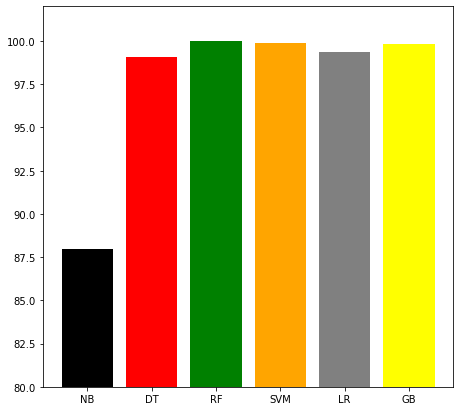

In [73]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.951,99.058,99.997,99.875,99.352,99.793]
f = plt.figure(figsize=(25,7),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values,color=['black', 'red', 'green', 'orange', 'grey','yellow'])

In [ ]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 6 artists>

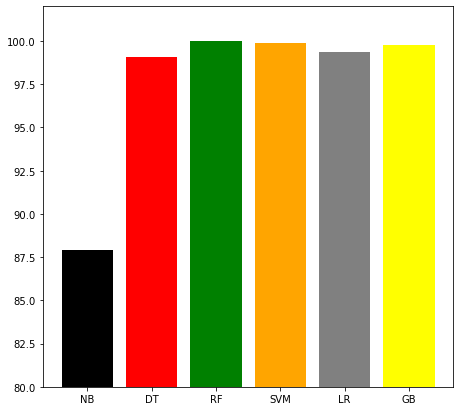

In [74]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.903,99.052,99.969,99.879,99.352,99.771]
f = plt.figure(figsize=(25,7),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values,color=['black', 'red', 'green', 'orange', 'grey','yellow'])

In [ ]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 6 artists>

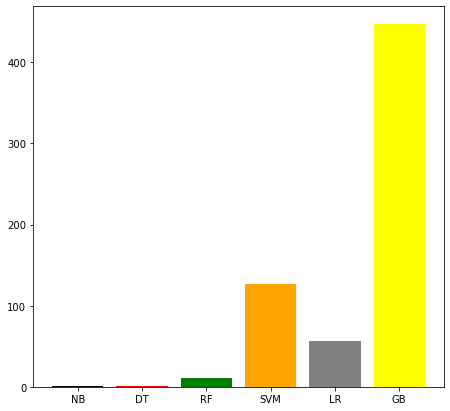

In [75]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099]
f = plt.figure(figsize=(25,7),num=10)
plt.subplot(131)
plt.bar(names,values,color=['black', 'red', 'green', 'orange', 'grey','yellow'])

In [ ]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416]
f = plt.figure(figsize=(25,7),num=10)
plt.subplot(131)
plt.bar(names,values,color=['black', 'red', 'green', 'orange', 'grey','yellow'])